In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
import scipy.stats as st

In [2]:
covid_file = './Resources/owid-covid-data.csv'

In [3]:
covid_file = pd.read_csv(covid_file)

In [4]:
covid_file.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
covid_file_clean = covid_file[['location','gdp_per_capita','life_expectancy','human_development_index']]
covid_file_clean.head()

,location,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,1803.987,64.83,0.511
1,Afghanistan,1803.987,64.83,0.511
2,Afghanistan,1803.987,64.83,0.511
3,Afghanistan,1803.987,64.83,0.511
4,Afghanistan,1803.987,64.83,0.511


In [6]:
covid_file_clean = covid_file_clean.rename(columns={'location':'country'
                                     })
covid_file_clean.head()

,country,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,1803.987,64.83,0.511
1,Afghanistan,1803.987,64.83,0.511
2,Afghanistan,1803.987,64.83,0.511
3,Afghanistan,1803.987,64.83,0.511
4,Afghanistan,1803.987,64.83,0.511


In [7]:
data_per_country = covid_file_clean.groupby(['country']).aggregate({'gdp_per_capita':np.max,
                                                                                      'life_expectancy':np.max,
                                                                                      'human_development_index':np.max,
                                                                                      })
data_per_country = data_per_country.reset_index()
data_per_country.head()

,country,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,1803.987,64.83,0.511
1,Africa,NaN,NaN,NaN
2,Albania,11803.431,78.57,0.795
3,Algeria,13913.839,76.88,0.748
4,Andorra,NaN,83.73,0.868


In [8]:
data_per_country_0 = data_per_country.fillna(0)
data_per_country_0.head()

,country,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,1803.987,64.83,0.511
1,Africa,0.000,0.00,0.000
2,Albania,11803.431,78.57,0.795
3,Algeria,13913.839,76.88,0.748
4,Andorra,0.000,83.73,0.868


In [9]:
final_dataset = pd.DataFrame(data_per_country_0)
final_dataset.head()

,country,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,1803.987,64.83,0.511
1,Africa,0.000,0.00,0.000
2,Albania,11803.431,78.57,0.795
3,Algeria,13913.839,76.88,0.748
4,Andorra,0.000,83.73,0.868


In [10]:
vax_file = './Resources/VaxbyMonth.csv'

In [11]:
vax_file = pd.read_csv(vax_file)

In [12]:
vax_file.head()

,Unnamed: 0,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,average_daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,average_daily_vaccinations_per_million
0,0,Afghanistan,2,8200.0,8200.0,0.0,0.000000,1171.714286,0.02,0.02,0.00,29.142857
1,1,Afghanistan,3,54000.0,54000.0,0.0,0.000000,2770.774194,0.14,0.14,0.00,69.483871
2,2,Afghanistan,4,240000.0,240000.0,0.0,0.000000,7320.200000,0.60,0.60,0.00,183.700000
3,3,Afghanistan,5,600152.0,480226.0,119926.0,92.225806,9220.580645,1.51,1.21,0.30,231.322581
4,4,Afghanistan,6,886854.0,699200.0,187654.0,133.833333,8096.633333,2.23,1.76,0.47,203.233333


In [13]:
total_vax_df = vax_file.groupby(['country']).agg(total_vaccinations=('total_vaccinations_per_hundred',max))
total_vax_df.head()

,total_vaccinations
country,
Afghanistan,13.13
Albania,75.40
Algeria,27.55
Andorra,137.59
Angola,30.41


In [14]:
complete_data = pd.merge(final_dataset,total_vax_df,on='country')
complete_data.head()

,country,gdp_per_capita,life_expectancy,human_development_index,total_vaccinations
0,Afghanistan,1803.987,64.83,0.511,13.13
1,Albania,11803.431,78.57,0.795,75.40
2,Algeria,13913.839,76.88,0.748,27.55
3,Andorra,0.000,83.73,0.868,137.59
4,Angola,5819.495,61.15,0.581,30.41


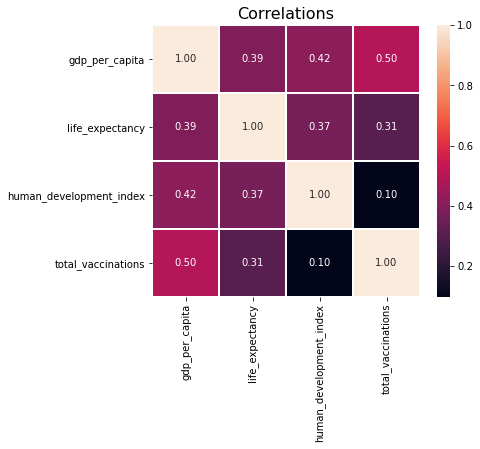

In [61]:
#correlation 
sns.heatmap(complete_data.corr(), linewidths=.5, annot=True, fmt=".2f")
plt.title('Correlations', fontsize=16)
plt.show()

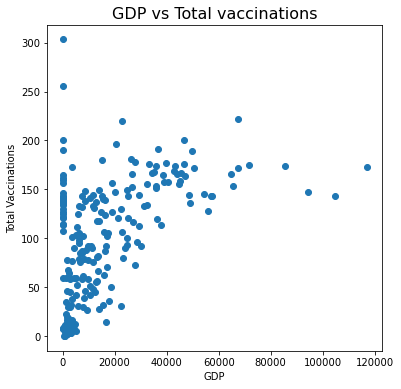

In [50]:
plt.rcParams['figure.figsize'] = [6, 6]
x_values = complete_data["gdp_per_capita"]
y_values = complete_data["total_vaccinations"]
plt.scatter(x_values,y_values)
plt.title('GDP vs Total vaccinations', size=16)
plt.xlabel('GDP')
plt.ylabel('Total Vaccinations')
plt.show()

The r-squared is: 0.2514597885998458


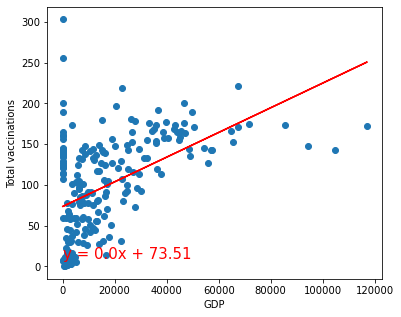

In [63]:
plt.rcParams['figure.figsize'] = [6, 5]
x_values = complete_data["gdp_per_capita"]
y_values = complete_data["total_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('GDP')
plt.ylabel('Total vaccinations')
print(f"The r-squared is: {rvalue**2}")
plt.show()

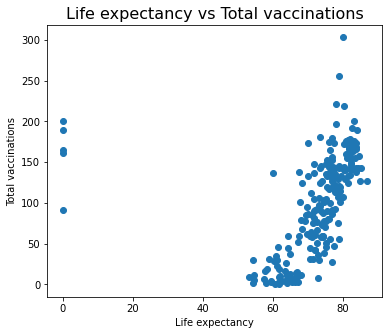

In [54]:
plt.rcParams['figure.figsize'] = [6, 5]
x_values = complete_data["life_expectancy"]
y_values = complete_data["total_vaccinations"]
plt.scatter(x_values,y_values)
plt.title('Life expectancy vs Total vaccinations', size=16)
plt.xlabel('Life expectancy')
plt.ylabel('Total vaccinations')
plt.show()

The r-squared is: 0.09339689748384691


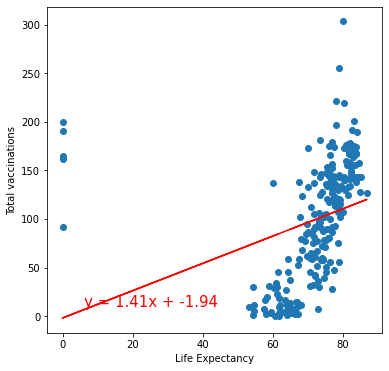

In [37]:
plt.rcParams['figure.figsize'] = [6, 6]
x_values = complete_data["life_expectancy"]
y_values = complete_data["total_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Life Expectancy')
plt.ylabel('Total vaccinations')
print(f"The r-squared is: {rvalue**2}")
plt.show()

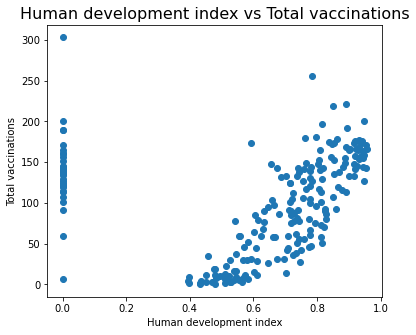

In [47]:
plt.rcParams['figure.figsize'] = [6, 5]
x_values = complete_data["human_development_index"]
y_values = complete_data["total_vaccinations"]
plt.scatter(x_values,y_values)
plt.title('Human development index vs Total vaccinations', size=16)
plt.xlabel('Human development index')
plt.ylabel('Total vaccinations')
plt.show()

The r-squared is: 0.009723572849191925


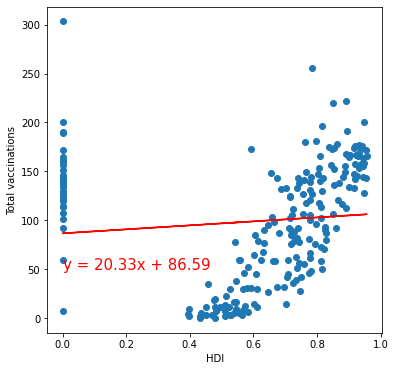

In [42]:
plt.rcParams['figure.figsize'] = [6, 6]
x_values = complete_data["human_development_index"]
y_values = complete_data["total_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('HDI')
plt.ylabel('Total vaccinations')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [56]:
#15 countries with the highest vaccination rate
top_fifteen_vaccination = complete_data.nlargest(15,['total_vaccinations'])
top_fifteen_vaccination

,country,gdp_per_capita,life_expectancy,human_development_index,total_vaccinations
76,Gibraltar,0.000,79.93,0.000,303.22
49,Cuba,0.000,78.80,0.783,255.29
207,United Arab Emirates,67293.483,77.97,0.890,221.45
40,Chile,22767.037,80.18,0.851,219.34
89,Iceland,46482.958,82.99,0.949,200.73
156,Pitcairn,0.000,0.00,0.000,200.00
210,Uruguay,20551.409,77.91,0.817,196.77
123,Malta,36513.323,82.53,0.895,191.46
100,Jersey,0.000,0.00,0.000,190.03
37,Cayman Islands,49903.029,83.92,0.000,189.05


In [57]:
#15 countries with the highest GDP
top_fifteen_gdp = complete_data.nlargest(15,['gdp_per_capita'])
top_fifteen_gdp

,country,gdp_per_capita,life_expectancy,human_development_index,total_vaccinations
159,Qatar,116935.600,80.23,0.848,172.48
117,Macao,104861.851,84.24,0.000,143.11
116,Luxembourg,94277.965,82.25,0.916,147.65
175,Singapore,85535.383,83.62,0.938,174.00
29,Brunei,71809.251,75.86,0.838,174.84
94,Ireland,67335.293,82.30,0.955,171.73
207,United Arab Emirates,67293.483,77.97,0.890,221.45
106,Kuwait,65530.537,75.49,0.806,153.31
147,Norway,64800.057,82.40,0.957,165.94
189,Switzerland,57410.166,83.78,0.955,143.25


In [58]:
#15 countries with lowest vaccine rate
bottom_fifteen_vaccination = complete_data.nsmallest(15,['total_vaccinations'])
bottom_fifteen_vaccination

,country,gdp_per_capita,life_expectancy,human_development_index,total_vaccinations
32,Burundi,702.225,61.58,0.433,0.03
53,Democratic Republic of Congo,808.133,60.68,0.480,0.24
85,Haiti,1653.173,64.00,0.510,1.60
39,Chad,1768.153,54.24,0.398,1.63
183,South Sudan,1569.888,57.85,0.433,2.27
216,Yemen,1479.147,66.12,0.470,2.58
118,Madagascar,1416.440,67.04,0.528,2.61
193,Tanzania,2683.304,65.46,0.529,2.76
31,Burkina Faso,1703.102,61.58,0.452,3.08
34,Cameroon,3364.926,59.29,0.563,3.56


In [59]:
#15 countries with lowest GDP
bottom_fifteen_gdp = complete_data.nsmallest(15,['gdp_per_capita'])
bottom_fifteen_gdp

,country,gdp_per_capita,life_expectancy,human_development_index,total_vaccinations
3,Andorra,0.0,83.73,0.868,137.59
5,Anguilla,0.0,81.88,0.000,134.11
24,Bonaire Sint Eustatius and Saba,0.0,77.79,0.000,135.55
28,British Virgin Islands,0.0,79.07,0.000,115.02
45,Cook Islands,0.0,76.25,0.000,138.44
49,Cuba,0.0,78.80,0.783,255.29
50,Curacao,0.0,78.88,0.000,120.99
65,Faeroe Islands,0.0,80.67,0.000,159.72
66,Falkland Islands,0.0,81.44,0.000,124.91
70,French Polynesia,0.0,77.66,0.000,113.61
